In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("HPI.csv")
print(df)

           DATE  House Price Index
0    1987-01-01             63.735
1    1987-02-01             64.134
2    1987-03-01             64.470
3    1987-04-01             64.974
4    1987-05-01             65.549
..          ...                ...
421  2022-02-01            287.276
422  2022-03-01            294.710
423  2022-04-01            301.486
424  2022-05-01            306.375
425  2022-06-01            308.183

[426 rows x 2 columns]


## The fluctuating house prices can be attributed to changes in supply and demand in the housing market. Following are the factors that affect house prices in the U.S. and can be used to predict house prices in the coming decade.

##  Demand
## Interest Rate (Inflation dependent)

Mortgage rate tells us how the real estate market will perform.Lower rates attracts and gives more opportunity for buyers and lower rates avoids loan default

## Employment

Unemployment rate can affect both demand and supply,high unemployment rate indicates people do not have money to spend on buying houses which implies overall lower supply due to less investment

## Affordability (Disposable income)

Higher income indicates people can spend more on buying houses. During periods of economic growth, demand for houses tends to rise

## Working Population (b/w 20 and 64)

Increasing population and average size of household can indicate increasing demand for houses

## Supply
## GDP

GDP tells use the overall health and growth of economy. If the economy is doing good then it implies more investment and buying

## Months of supply

It tells us the number of months required to sell current inventory of houses given the current sales pace which could affect the prices of houses depending upon the demand and supply

**I have used the MECE framework here as all the factors have no overlapping and collectively they cover every quantifiable factor that can influence the HPI.**
Following is the quantitative analysis of these factors and their effect on housing prices.

In [7]:
months_of_supply=pd.read_csv("MOS.csv")
print(months_of_supply)

           DATE  MSACSR
0    1990-01-01     7.0
1    1990-02-01     7.6
2    1990-03-01     7.8
3    1990-04-01     8.3
4    1990-05-01     8.2
..          ...     ...
386  2022-03-01     7.0
387  2022-04-01     8.4
388  2022-05-01     8.4
389  2022-06-01     9.2
390  2022-07-01    10.9

[391 rows x 2 columns]


In [8]:
unemployment=pd.read_csv("UNRATE.csv")
print(unemployment)

           DATE  UNRATE
0    1948-01-01     3.4
1    1948-02-01     3.8
2    1948-03-01     4.0
3    1948-04-01     3.9
4    1948-05-01     3.5
..          ...     ...
891  2022-04-01     3.6
892  2022-05-01     3.6
893  2022-06-01     3.6
894  2022-07-01     3.5
895  2022-08-01     3.7

[896 rows x 2 columns]


In [9]:
mortgage_rate=pd.read_csv("MORT_US.csv")
print(mortgage_rate)

           DATE  MORTGAGE30US
0    1990-01-01      9.895000
1    1990-02-01     10.197500
2    1990-03-01     10.268000
3    1990-04-01     10.370000
4    1990-05-01     10.477500
..          ...           ...
388  2022-05-01      5.230000
389  2022-06-01      5.522000
390  2022-07-01      5.412500
391  2022-08-01      5.222500
392  2022-09-01      5.856667

[393 rows x 2 columns]


In [10]:
gdp=pd.read_csv("US_GDP.csv")
print(gdp)

           DATE  USALORSGPNOSTSAM
0    1990-01-01        101.321952
1    1990-02-01        101.342969
2    1990-03-01        101.337200
3    1990-04-01        101.293180
4    1990-05-01        101.202847
..          ...               ...
384  2022-01-01        100.182995
385  2022-02-01        100.067670
386  2022-03-01         99.927149
387  2022-04-01         99.779866
388  2022-05-01         99.637347

[389 rows x 2 columns]


In [16]:
real_disposable_income=pd.read_csv("RDP.csv")
print(real_disposable_income)

           DATE  DSPIC96
0    1959-01-01   2191.5
1    1959-02-01   2198.1
2    1959-03-01   2210.7
3    1959-04-01   2225.0
4    1959-05-01   2237.1
..          ...      ...
758  2022-03-01  15119.6
759  2022-04-01  15143.3
760  2022-05-01  15142.2
761  2022-06-01  15105.1
762  2022-07-01  15145.6

[763 rows x 2 columns]


In [17]:
#taking last 20 years into consideration
gdp=gdp[gdp["DATE"]>="2002-01-01"]
mortgage_rate=mortgage_rate[mortgage_rate["DATE"]>="2002-01-01"]
unemployment=unemployment[unemployment["DATE"]>="2002-01-01"]
months_of_supply=months_of_supply[months_of_supply["DATE"]>="2002-01-01"]
df=df[df["DATE"]>="2002-01-01"]
real_disposable_income=real_disposable_income[real_disposable_income["DATE"]>="2002-01-01"]

In [18]:
df=df[df["DATE"]>="2002-01-01"]

In [54]:
d1=df.merge(unemployment,how="inner",on="DATE")
d2=d1.merge(mortgage_rate,how="inner",on="DATE")
d3=d2.merge(gdp,how="inner",on="DATE")
d4=d3.merge(months_of_supply,how="inner",on="DATE")
new_df=d4.merge(real_disposable_income,how="inner",on="DATE")
print(new_df)

           DATE  House Price Index  UNRATE  MORTGAGE30US  USALORSGPNOSTSAM  \
0    2002-01-01            116.436     5.7        6.9975         99.143458   
1    2002-02-01            116.916     5.7        6.8925         99.139904   
2    2002-03-01            117.929     5.7        7.0140         99.133856   
3    2002-04-01            119.209     5.9        6.9850         99.115700   
4    2002-05-01            120.788     5.8        6.8060         99.078773   
..          ...                ...     ...           ...               ...   
240  2022-01-01            282.032     4.0        3.4450        100.182995   
241  2022-02-01            287.276     3.8        3.7625        100.067670   
242  2022-03-01            294.710     3.6        4.1720         99.927149   
243  2022-04-01            301.486     3.6        4.9825         99.779866   
244  2022-05-01            306.375     3.6        5.2300         99.637347   

     MSACSR  DSPIC96  
0       4.2   9951.9  
1       4.0   996

In [55]:
new_df.drop("DATE",axis=1,inplace=True)
X=new_df.drop("House Price Index",axis=1)


In [56]:
Y=new_df["House Price Index"]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [59]:
Linear=LinearRegression()


In [60]:
Linear.fit(x_train,y_train)

LinearRegression()

In [61]:
y_predict=Linear.predict(x_test)

In [62]:
print(Linear.coef_)
print(Linear.intercept_)
print(Linear.score(x_train, y_train))
print(Linear.score(x_test, y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))



[-5.08300742 11.43037753 -1.29817662  1.07282987  0.02275545]
-11.820195373257121
0.7942091166672756
0.8184557349107382
Mean Absolute Error: 10.422025464950774
Mean Squared Error: 197.790392809835
Root Mean Squared Error: 14.063797240071224


Mean Absolute Error: 10.422025464950782

Mean Squared Error: 197.79039280983503

Root Mean Squared Error: 14.063797240071226



In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [65]:
xg=XGBRegressor()

In [66]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [67]:
xg.score(x_train,y_train)

0.9999995527149139

In [68]:
cv=cross_val_score(xg,x_train,y_train,cv=10)
print(cv.mean())

0.9663407975748994


In [71]:
predict=xg.predict(x_test)
print(predict)

[139.51039  120.970535 163.51756  212.3563   205.63396  185.71136
 197.82922  138.5077   127.26897  146.327    174.29422  207.84035
 140.57588  181.50473  154.27588  160.9765   192.5395   128.10721
 181.7442   161.73883  157.771    139.6155   139.99121  159.48216
 204.624    138.64925  127.32128  175.97299  164.36813  163.66832
 142.56871  232.17744  141.73944  182.55354  140.02362  138.21613
 145.07465  206.38373  160.182    285.96918  168.61171  142.75842
 141.23041  131.15756  205.94315  178.98582  209.35025  167.18188
 201.7985  ]


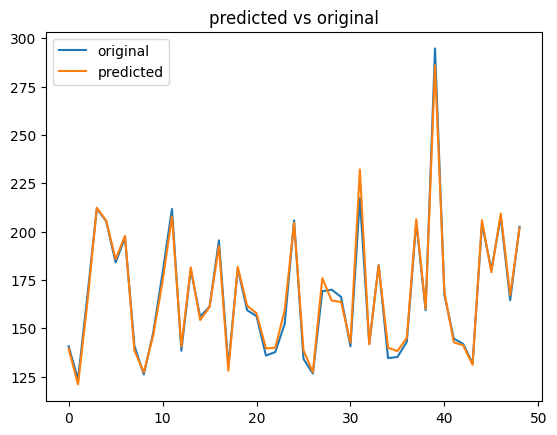

In [72]:
x=range(len(y_test))
plt.plot(x,y_test,label="original")
plt.plot(x,predict,label="predicted")
plt.title("predicted vs original")
plt.legend()
plt.show()